In [1]:
# %matplotlib notebook
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [92]:
# close opened serial
if (ser):
    ser.close()

In [95]:
record_time = 8
nChannel = 16
nByte = nChannel*2
serial_port = 'COM5'


serial_out = []

for i in range(5):
    print(5-i)
    time.sleep(1)

    


try:
    ser = serial.Serial(serial_port, 500000)
except:
    ser.close()
    
print(ser.name)
end_time = time.time() + record_time
while time.time() < end_time:
    x = ser.read(nByte)
    serial_out.append(x)

    
    
print(len(serial_out))
print(serial_out)
ser.close()

5
4
3
2
1
COM5
8002
[b'\x00\x00\x05P\x06;\x03\xcb\x0f\xa6\x06\x10\x0f\xa9\x0f\xa2\x07@\x06\xff\x07\\\x068\x07\x06\x07t\x071\x07\xa7', b'\x00\x00\x05\xb7\x03\xc8\x04x\x0f\xa6\x0f\x99\r\x80\x0f\xa1\x07@\x06\xff\x07\\\x068\x07\x06\x07t\x072\x07\xa8', b'\x00\x00\x06g\x018\x04\xf0\x0f\xa6\x0f\x98\rO\x0f\xa2\x07A\x06\xff\x07[\x068\x07\x05\x07t\x072\x07\xa7', b'\x00\x00\x07A\x00\x00\x06(\x0f\xa7\x0f\x98\rH\x0f\xa1\x07@\x06\xff\x07\\\x068\x07\x06\x07t\x071\x07\xa7', b'\x00\xfc\x08\xe7\x00\x00\x08\x03\x0f\xa6\x0f\x97\rC\x0f\xa2\x07@\x06\xff\x07\\\x068\x07\x06\x07t\x072\x07\xa7', b'\x02\xe0\t\xb7\x00\x00\t\xbb\x0f\xa5\x0f\x98\r@\x0f\xa1\x07@\x06\xff\x07\\\x068\x07\x05\x07t\x072\x07\xa7', b'\x02\xdc\t\xbe\x00\x03\t\xc3\x0f\xa6\x0f\x99\x0f\xa9\x04\xe7\x07@\x06\xff\x07\\\x068\x07\x06\x07t\x072\x07\xa7', b'\x00\x00\x07a\x02\xee\x06T\x0f\xa6\x0f\x98\x0f\xa9\x04\xc7\x07@\x06\xff\x07[\x068\x07\x06\x07t\x072\x07\xa8', b'\x00\x00\x06s\x03\xfb\x05\xad\x0f\xa6\x0f\x98\x0f\xa9\x04\xbf\x07A\x06\xff\x07[\x068

In [96]:
%%time
samples = np.array([])
for sample in serial_out:
    for channel in range(0,nByte,2):
         samples = np.append(samples, int.from_bytes(sample[channel:channel+2], byteorder='big', signed=False))

samples = np.reshape(samples, (len(serial_out), nChannel))
del serial_out

# print(samples[:10])

Wall time: 8.78 s


In [97]:
record = open("signal_record_fix10.txt", "w")
g = (value for value in samples)

for x in g:
    for y in x:
        record.write(str(int(y)) + ",")
    record.write("\n")
# record.write(((int)value for value in samples))

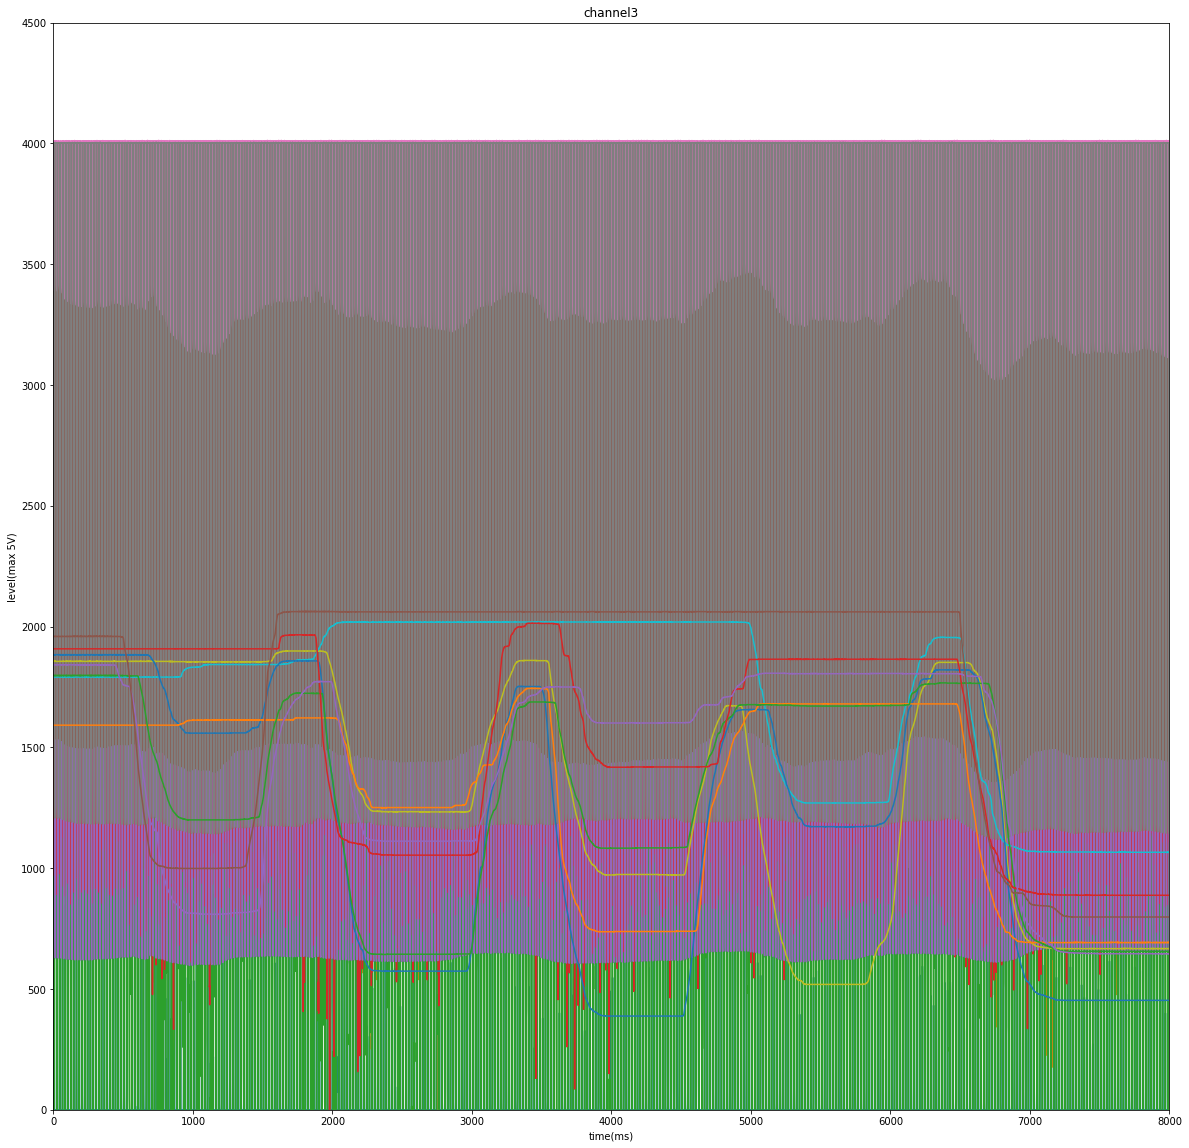

In [103]:
plt.figure(figsize=(20, 20))
plt.xlabel('time(ms)')
plt.ylabel('level(max 5V)')
plt.title('channel3')
plt.plot(samples[:])
plt.axis([0, 8000, 0, 4500])
plt.show()
# Axes3D.plot_wireframe(samples)

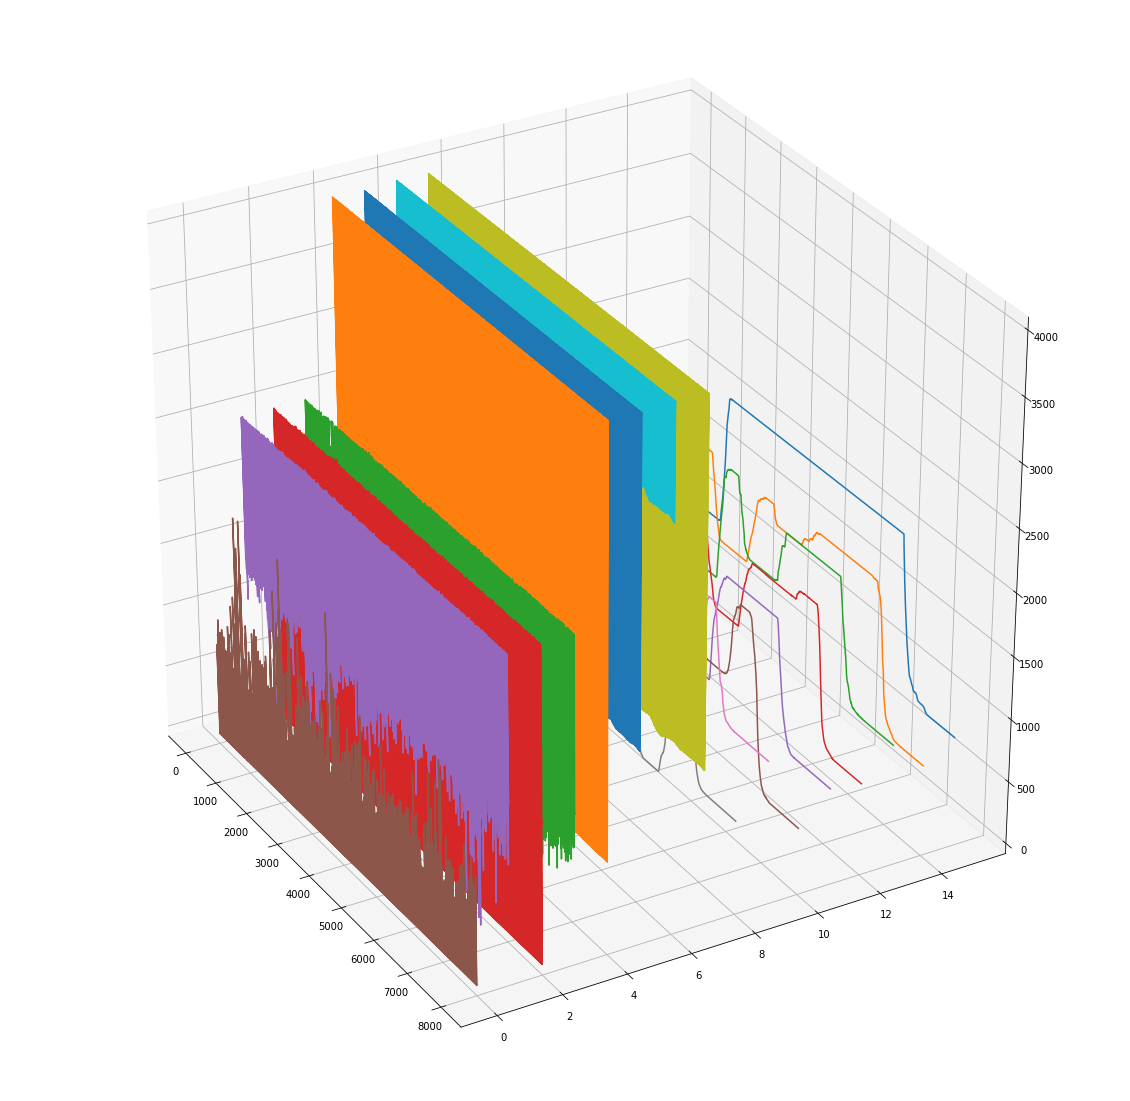

Wall time: 1.72 s


In [120]:
%%time
# print(samples[:100])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(20,20))

# datasets = [{"x":np.arange(0, len(samples[:,i]), 1) , "z":samples[:,i], "y":[i for _ in range(len(samples[:,i]))], "colour": "red"} for i in range(nChannel)]
datasets = [{"x":np.arange(0, len(samples[:,i]), 1) , "z":samples[:,i], "y":[i for _ in range(len(samples[:,i]))]} for i in range(nChannel)]

ax.view_init(30, -30)

for dataset in datasets[::-1]:
#     ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])
    ax.plot(dataset["x"], dataset["y"], dataset["z"])

plt.show()